In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
path = r"C:\Users\ahamr\Desktop\Machine Learning\Data Sets"

In [3]:
df = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))

In [4]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
# Storing column names in a list
column_names = list(df.columns)
print("Column Names:", column_names)

Column Names: ['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 

In [6]:
#identify the useful numeric columns

columns = ['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 'GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 'HEATHROW_temp_min', 'HEATHROW_temp_max', 'KASSEL_wind_speed', 'KASSEL_humidity', 'KASSEL_pressure', 'KASSEL_global_radiation', 'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean', 'KASSEL_temp_min', 'KASSEL_temp_max', 'LJUBLJANA_cloud_cover', 'LJUBLJANA_wind_speed', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max', 'MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max', 'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_global_radiation', 'MADRID_precipitation', 'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max', 'MUNCHENB_cloud_cover', 'MUNCHENB_humidity', 'MUNCHENB_global_radiation', 'MUNCHENB_precipitation', 'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'SONNBLICK_cloud_cover', 'SONNBLICK_wind_speed', 'SONNBLICK_humidity', 'SONNBLICK_pressure', 'SONNBLICK_global_radiation', 'SONNBLICK_precipitation', 'SONNBLICK_sunshine', 'SONNBLICK_temp_mean', 'SONNBLICK_temp_min', 'SONNBLICK_temp_max', 'STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max']

In [7]:
#create scaler object using StandardScaler from sklearn.preprocessing
#StandardScaler assumes data is normally distributed and scales with a distribution
#around 0 and standard deviation of 1. Scaling happens independently with each variable.

scaler = StandardScaler()

In [8]:
#create new df with scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=columns)
df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [9]:
date_month_df = df[['DATE', 'MONTH']]

In [10]:
df_scaled = df_scaled.drop(['DATE', 'MONTH'], axis=1)

In [11]:
df_scaled_with_date_month = pd.concat([date_month_df, df_scaled], axis=1)

In [12]:
df_scaled_with_date_month.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [13]:
df = df_scaled_with_date_month

In [14]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [15]:
#Reduce to just the mean temperatures
df_temp = df[['DATE', 'MONTH','BASEL_temp_mean',
 'BELGRADE_temp_mean',
 'BUDAPEST_temp_mean',
 'DEBILT_temp_mean',
 'DUSSELDORF_temp_mean',
 'GDANSK_temp_mean',
 'HEATHROW_temp_mean',
 'KASSEL_temp_mean',
 'LJUBLJANA_temp_mean',
 'MAASTRICHT_temp_mean',
 'MADRID_temp_mean',
 'MUNCHENB_temp_mean',
 'OSLO_temp_mean',
 'ROMA_temp_mean',
 'SONNBLICK_temp_mean',
 'STOCKHOLM_temp_mean',
 'TOURS_temp_mean',
 'VALENTIA_temp_mean']].copy()

In [16]:
#Reducing dataset to a decade
df_final = df_temp[df_temp['DATE'].astype(str).str.contains('199')] 
df_final

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
10958,19900101,1,-1.696559,-1.584333,-1.369721,-1.506712,-1.490139,-1.298463,-1.172216,-1.541424,-1.479805,-1.447359,-0.974801,-1.811529,-1.594218,-1.937140,-0.460708,-1.274353,-1.528019,-1.148890
10959,19900102,1,-1.655817,-1.538937,-1.428538,-1.427601,-1.269240,-1.081061,-1.049918,-1.452825,-1.528241,-1.342338,-1.136550,-1.522480,-1.497139,-1.566700,-0.782460,-1.448521,-1.292705,-1.028721
10960,19900103,1,-1.710140,-1.527588,-1.440302,-1.301023,-1.460686,-1.196156,-1.259573,-1.570958,-1.382933,-1.387347,-1.069155,-1.359104,-1.703431,-1.600376,-0.972586,-1.361437,-1.261329,-0.878510
10961,19900104,1,-1.506430,-1.788618,-1.616753,-1.538357,-1.401779,-1.515865,-1.032446,-1.570958,-1.516132,-1.642398,-1.136550,-1.710990,-1.023880,-1.583538,-1.001836,-0.938458,-1.386830,-1.269058
10962,19900105,1,-1.411366,-2.083696,-1.687333,-1.063690,-1.107247,-1.592595,-0.805320,-1.408526,-1.794639,-1.237316,-1.082634,-1.447075,-0.878261,-1.886626,-0.870210,-0.963339,-1.135828,-0.397835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14605,19991227,12,-0.732333,-0.971480,-0.910949,-0.984579,-1.121973,-1.145003,-1.399343,-1.127962,-0.959118,-1.042277,-0.476075,-0.856409,-0.696239,-0.303834,-1.352838,-0.789171,-0.790700,-1.779775
14606,19991228,12,-1.085430,-0.903385,-1.310904,-1.348490,-1.195607,-0.965966,-1.364400,-1.127962,-1.189189,-1.177304,-0.988280,-1.145458,-0.878261,-0.758466,-1.440589,-0.963339,-1.182891,-1.629564
14607,19991229,12,-1.166914,-1.209812,-1.193270,-1.079512,-1.166153,-1.311252,-1.608998,-1.039362,-1.540350,-1.177304,-1.554402,-1.183161,-1.205902,-1.768758,-1.923217,-1.174829,-1.386830,-1.088805
14608,19991230,12,-1.261978,-1.402747,-1.169744,-1.126979,-1.077794,-1.183368,-1.364400,-1.172261,-1.721985,-1.147298,-1.567881,-1.208295,-1.921859,-0.000746,-2.010968,-1.734655,-1.371143,-0.698257


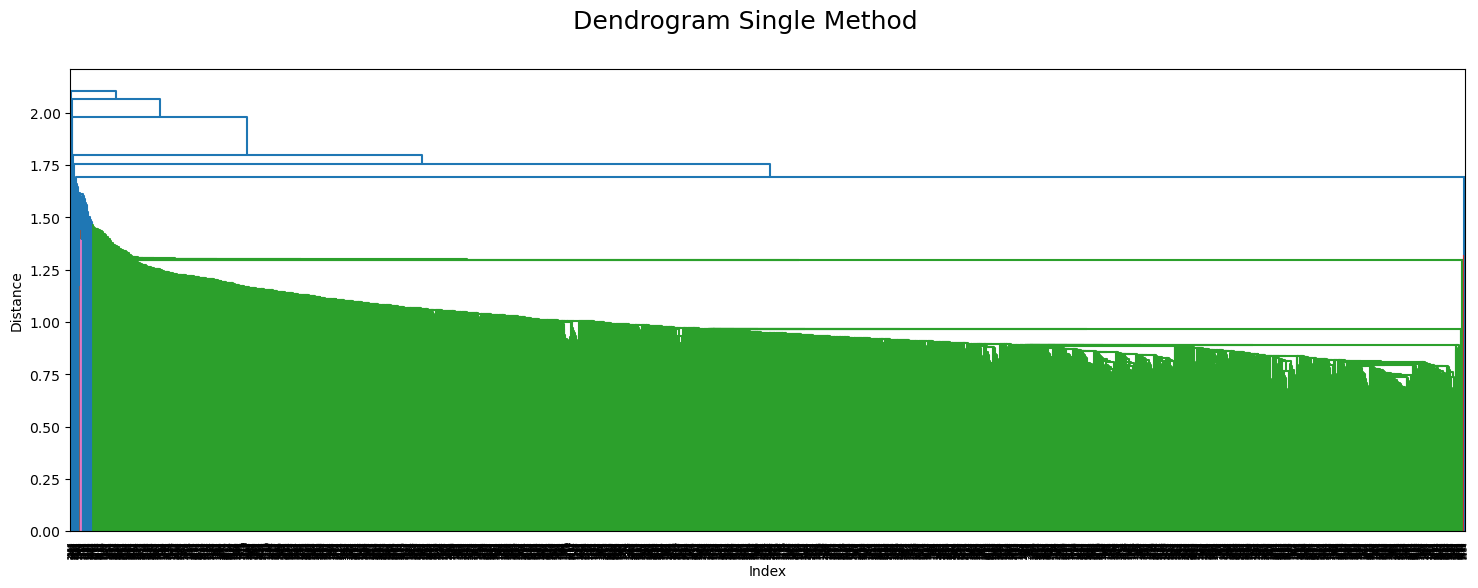

In [17]:
distance_single = linkage(df_final.loc[:,['BASEL_temp_mean',
                                          'BELGRADE_temp_mean',
                                          'BUDAPEST_temp_mean',
                                          'DEBILT_temp_mean',
                                          'DUSSELDORF_temp_mean',
                                          'GDANSK_temp_mean',
                                          'HEATHROW_temp_mean',
                                          'KASSEL_temp_mean',
                                          'LJUBLJANA_temp_mean',
                                          'MAASTRICHT_temp_mean',
                                          'MADRID_temp_mean',
                                          'MUNCHENB_temp_mean',
                                          'OSLO_temp_mean',
                                          'ROMA_temp_mean',
                                          'SONNBLICK_temp_mean',
                                          'STOCKHOLM_temp_mean',
                                          'TOURS_temp_mean',
                                          'VALENTIA_temp_mean']],
                         method="single")

plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

In [18]:
#Reducing dataset to a decade
df_final_year = df_temp[df_temp['DATE'].astype(str).str.contains('1990')] 
df_final_year

,DATE,MONTH,BASEL_temp_mean,BELGRADE_temp_mean,BUDAPEST_temp_mean,DEBILT_temp_mean,DUSSELDORF_temp_mean,GDANSK_temp_mean,HEATHROW_temp_mean,KASSEL_temp_mean,LJUBLJANA_temp_mean,MAASTRICHT_temp_mean,MADRID_temp_mean,MUNCHENB_temp_mean,OSLO_temp_mean,ROMA_temp_mean,SONNBLICK_temp_mean,STOCKHOLM_temp_mean,TOURS_temp_mean,VALENTIA_temp_mean
10958,19900101,1,-1.696559,-1.584333,-1.369721,-1.506712,-1.490139,-1.298463,-1.172216,-1.541424,-1.479805,-1.447359,-0.974801,-1.811529,-1.594218,-1.937140,-0.460708,-1.274353,-1.528019,-1.148890
10959,19900102,1,-1.655817,-1.538937,-1.428538,-1.427601,-1.269240,-1.081061,-1.049918,-1.452825,-1.528241,-1.342338,-1.136550,-1.522480,-1.497139,-1.566700,-0.782460,-1.448521,-1.292705,-1.028721
10960,19900103,1,-1.710140,-1.527588,-1.440302,-1.301023,-1.460686,-1.196156,-1.259573,-1.570958,-1.382933,-1.387347,-1.069155,-1.359104,-1.703431,-1.600376,-0.972586,-1.361437,-1.261329,-0.878510
10961,19900104,1,-1.506430,-1.788618,-1.616753,-1.538357,-1.401779,-1.515865,-1.032446,-1.570958,-1.516132,-1.642398,-1.136550,-1.710990,-1.023880,-1.583538,-1.001836,-0.938458,-1.386830,-1.269058
10962,19900105,1,-1.411366,-2.083696,-1.687333,-1.063690,-1.107247,-1.592595,-0.805320,-1.408526,-1.794639,-1.237316,-1.082634,-1.447075,-0.878261,-1.886626,-0.870210,-0.963339,-1.135828,-0.397835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11318,19901227,12,-0.515042,-1.005527,-1.299141,-0.589023,-0.842167,-0.786929,-0.945090,-0.832631,-1.177080,-0.772222,-0.840010,-0.491955,-0.659834,-1.246774,-0.943336,-0.453275,-0.712262,-0.998679
11319,19901228,12,-0.895301,-1.107669,-1.169744,-0.810534,-0.753808,-0.825294,-0.648078,-1.024596,-1.092317,-0.862240,-0.907406,-1.057487,-0.805452,-1.263612,-1.338213,-0.639884,-0.759325,-0.788384
11320,19901229,12,-0.012558,-1.289256,-1.463829,-0.240934,-0.400369,-0.850871,-0.648078,-0.463468,-1.080208,-0.247115,-0.853490,-0.077232,-0.684104,-1.566700,-0.723959,-0.565240,-0.100445,-1.899944
11321,19901230,12,0.218313,-0.937432,-1.263851,-0.604845,-0.503455,-0.659045,-0.857734,-0.611133,-0.801701,-0.532173,-0.893927,-0.240607,-1.145228,-0.960524,-0.007330,-0.602562,-0.382822,-1.779775


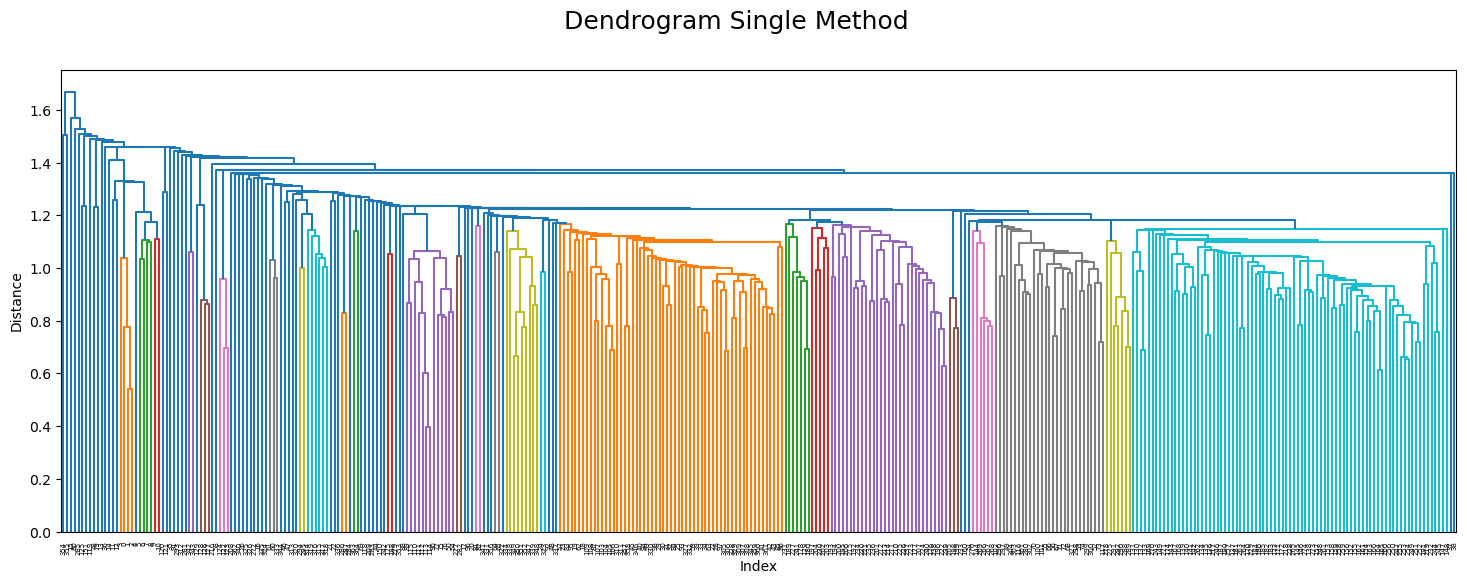

In [19]:
distance_single = linkage(df_final_year.loc[:,['BASEL_temp_mean',
                                          'BELGRADE_temp_mean',
                                          'BUDAPEST_temp_mean',
                                          'DEBILT_temp_mean',
                                          'DUSSELDORF_temp_mean',
                                          'GDANSK_temp_mean',
                                          'HEATHROW_temp_mean',
                                          'KASSEL_temp_mean',
                                          'LJUBLJANA_temp_mean',
                                          'MAASTRICHT_temp_mean',
                                          'MADRID_temp_mean',
                                          'MUNCHENB_temp_mean',
                                          'OSLO_temp_mean',
                                          'ROMA_temp_mean',
                                          'SONNBLICK_temp_mean',
                                          'STOCKHOLM_temp_mean',
                                          'TOURS_temp_mean',
                                          'VALENTIA_temp_mean']],
                         method="single")

plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

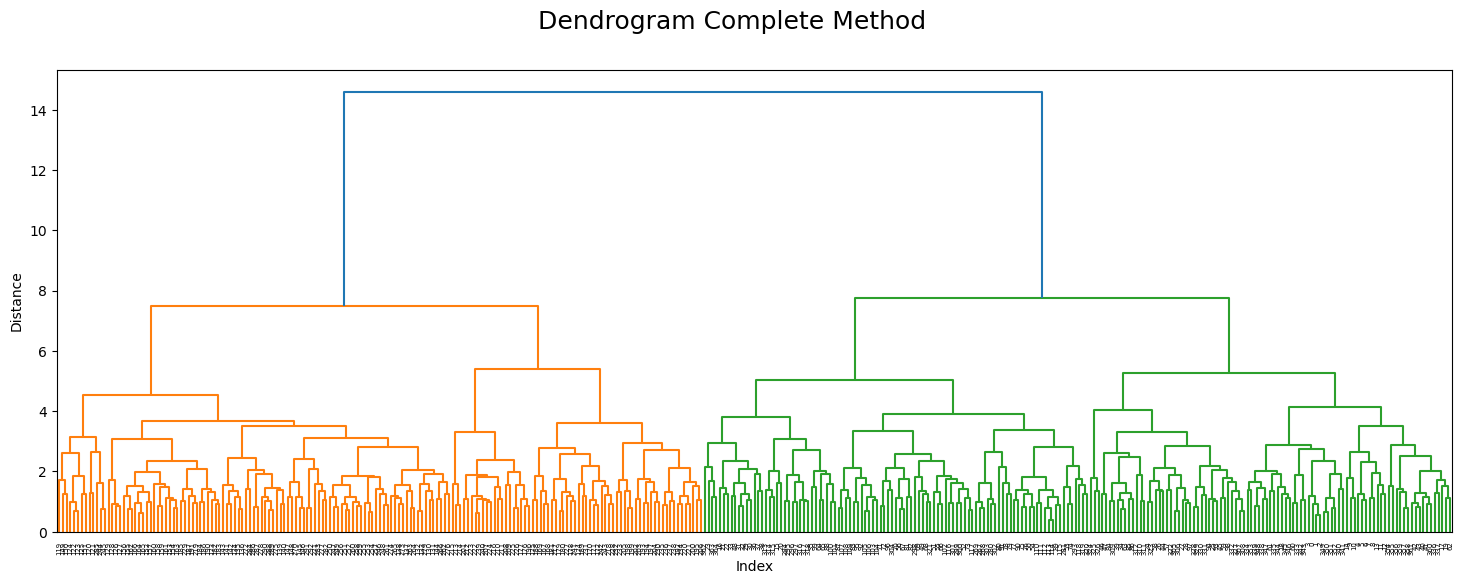

In [23]:
distance_complete = linkage(df_final_year.loc[:,['BASEL_temp_mean',
                                          'BELGRADE_temp_mean',
                                          'BUDAPEST_temp_mean',
                                          'DEBILT_temp_mean',
                                          'DUSSELDORF_temp_mean',
                                          'GDANSK_temp_mean',
                                          'HEATHROW_temp_mean',
                                          'KASSEL_temp_mean',
                                          'LJUBLJANA_temp_mean',
                                          'MAASTRICHT_temp_mean',
                                          'MADRID_temp_mean',
                                          'MUNCHENB_temp_mean',
                                          'OSLO_temp_mean',
                                          'ROMA_temp_mean',
                                          'SONNBLICK_temp_mean',
                                          'STOCKHOLM_temp_mean',
                                          'TOURS_temp_mean',
                                          'VALENTIA_temp_mean']],
                         method="complete")

plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

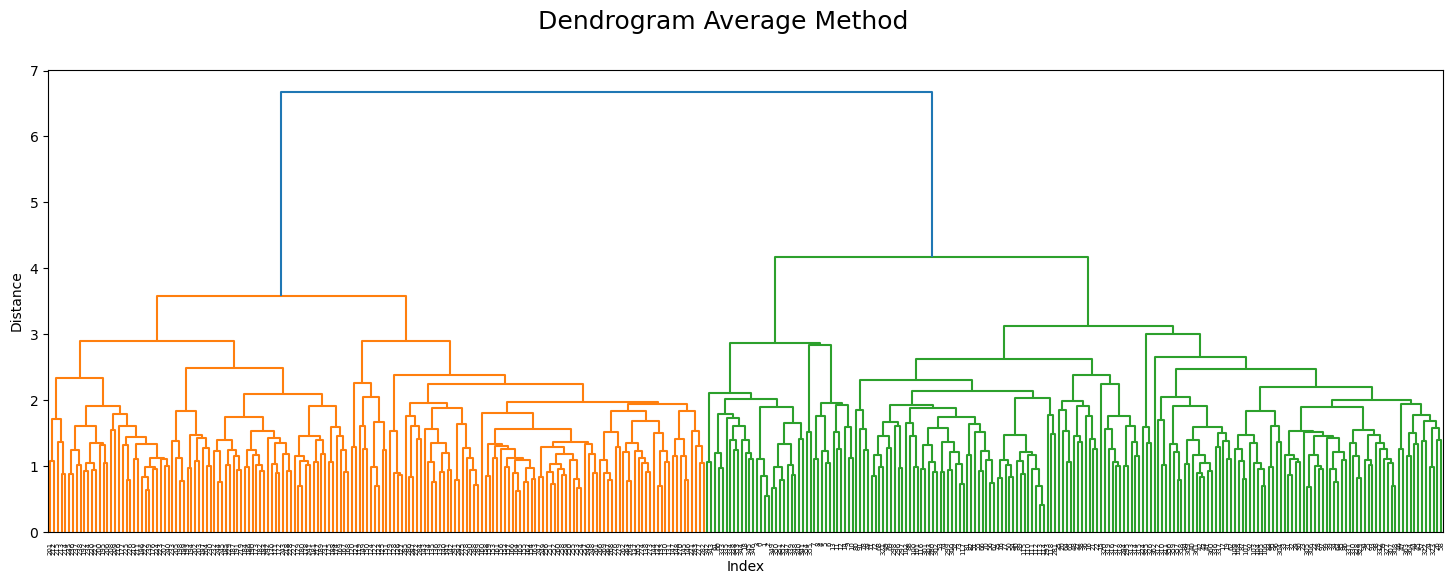

In [24]:
distance_average = linkage(df_final_year.loc[:,['BASEL_temp_mean',
                                          'BELGRADE_temp_mean',
                                          'BUDAPEST_temp_mean',
                                          'DEBILT_temp_mean',
                                          'DUSSELDORF_temp_mean',
                                          'GDANSK_temp_mean',
                                          'HEATHROW_temp_mean',
                                          'KASSEL_temp_mean',
                                          'LJUBLJANA_temp_mean',
                                          'MAASTRICHT_temp_mean',
                                          'MADRID_temp_mean',
                                          'MUNCHENB_temp_mean',
                                          'OSLO_temp_mean',
                                          'ROMA_temp_mean',
                                          'SONNBLICK_temp_mean',
                                          'STOCKHOLM_temp_mean',
                                          'TOURS_temp_mean',
                                          'VALENTIA_temp_mean']],
                         method="average")

plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

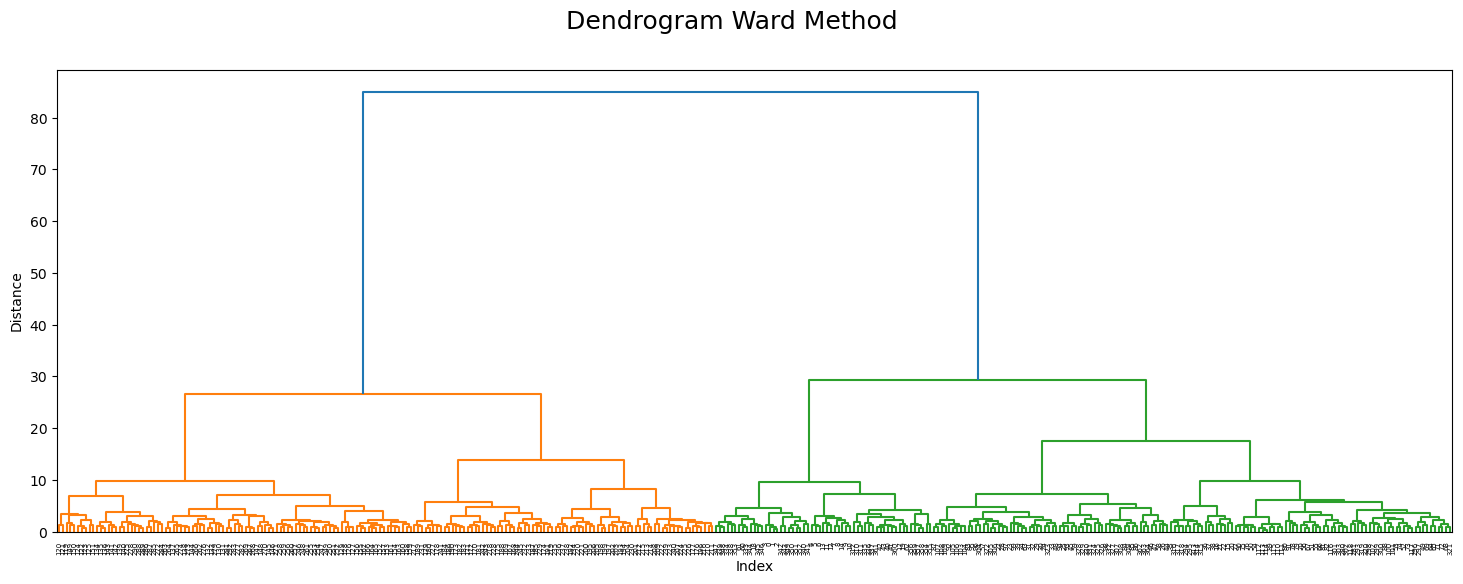

In [25]:
distance_ward = linkage(df_final_year.loc[:,['BASEL_temp_mean',
                                          'BELGRADE_temp_mean',
                                          'BUDAPEST_temp_mean',
                                          'DEBILT_temp_mean',
                                          'DUSSELDORF_temp_mean',
                                          'GDANSK_temp_mean',
                                          'HEATHROW_temp_mean',
                                          'KASSEL_temp_mean',
                                          'LJUBLJANA_temp_mean',
                                          'MAASTRICHT_temp_mean',
                                          'MADRID_temp_mean',
                                          'MUNCHENB_temp_mean',
                                          'OSLO_temp_mean',
                                          'ROMA_temp_mean',
                                          'SONNBLICK_temp_mean',
                                          'STOCKHOLM_temp_mean',
                                          'TOURS_temp_mean',
                                          'VALENTIA_temp_mean']],
                         method="ward")

plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)  # Use the actual output
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()